<a href="https://www.kaggle.com/code/ardahanaytan/veri-analizi-bootcamp?scriptVersionId=209088358" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **0. Projeyi Hazırlayanlar**

### 1.  Ardahan Aytan -- github.com/ardahanaytan
### 2.  Yağmur Aktaş -- github.com/yamuraktas

# **1. Veri Setinin Hazırlanması**

In [1]:
import numpy as np
import pandas as pd
# Pandas ve numpy kütüphanelerini yükleyerek başlıyoruz.

import matplotlib.pyplot as plt
import seaborn as sns 
# Görselleştirme kütüphaneleri

In [2]:
df_ = pd.read_excel('/kaggle/input/coffee-sales/Coffee Shop Sales.xlsx')
#df = df_.copy()
# Data setimizi kullanılabilir formata soktuk.

In [3]:
df = df_.copy()
# Bir hata yaptığımda pd.read_excel kodunu tekrar çalıştırdığı için çok uzun sürüyordu.
# O yüzden copy kısmını buraya aldım.

In [4]:
#Veri setimize null değerler ekliyoruz

import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05,
                              seed: random = 42) -> pd.DataFrame:
    
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

df = add_random_missing_values(dataframe = df,
                               missing_rate = 0.03)
    

# **2. Veri Setinin İncelenmesi**

In [5]:
df.head()
# Data setimizi inceliyoruz.

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1.0,2023-01-01,07:06:11,2.0,5.0,Lower Manhattan,32.0,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2.0,2023-01-01,07:08:56,2.0,5.0,Lower Manhattan,57.0,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3.0,2023-01-01,07:14:04,2.0,5.0,Lower Manhattan,59.0,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4.0,2023-01-01,07:20:24,1.0,5.0,Lower Manhattan,22.0,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5.0,2023-01-01,07:22:41,2.0,5.0,Lower Manhattan,57.0,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [6]:
df.tail()
# transaction_id ve indeximizin aynı doğrultuda gidip gitmediğini kontrol ettik.
# Gitmediğini gördük.
# İlerde indeximi transaction_date ve transaction_time sütunlarından oluşturabileceğimizi düşündük.

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
149111,149452.0,2023-06-30,20:18:41,2.0,8.0,Hell's Kitchen,44.0,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453.0,2023-06-30,NaN,2.0,8.0,Hell's Kitchen,49.0,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454.0,2023-06-30,20:31:34,1.0,8.0,Hell's Kitchen,45.0,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455.0,2023-06-30,20:57:19,1.0,8.0,Hell's Kitchen,40.0,3.75,Coffee,Barista Espresso,Cappuccino
149115,149456.0,2023-06-30,20:57:19,2.0,8.0,Hell's Kitchen,64.0,0.80,Flavours,Regular syrup,Hazelnut syrup


In [7]:
df.info()
# Veri setimize ait yapısal bilgileri incelemek istedik.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    144678 non-null  float64       
 1   transaction_date  144627 non-null  datetime64[ns]
 2   transaction_time  144697 non-null  object        
 3   transaction_qty   144763 non-null  float64       
 4   store_id          144721 non-null  float64       
 5   store_location    144833 non-null  object        
 6   product_id        144657 non-null  float64       
 7   unit_price        144644 non-null  float64       
 8   product_category  144855 non-null  object        
 9   product_type      144700 non-null  object        
 10  product_detail    144614 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 12.5+ MB


# **3. Eksik Veri Analizi**

Veri setimizi inceledik ve  ilk olarak transaction_date ile transaction_time sütunlarını birleştirerek index haline getirmeye karar verdik. transaction_time sütunumuzun datetime yerine object tipinde olduğunu gördük. Aynı zamanda sütunlardaki null değerlerin de acilen düzeltilmesi gerektiğini anladık.

In [8]:
df['transaction_date'] = df['transaction_date'].fillna(method='ffill')
df['transaction_date'].isna().sum()
# transaction_date sütununu incelemiştik ve kronolojik sırayla ilerlediğini görmüştük. 
# Bu yüzden null değerleri bir önceki değer ile doldurduk.

/tmp/ipykernel_18/4213351654.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['transaction_date'] = df['transaction_date'].fillna(method='ffill')


0

In [9]:
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S', errors='coerce')
df['transaction_time']= df['transaction_time'].fillna(method='ffill') + pd.to_timedelta(df['transaction_time'].isna().cumsum(), unit='m')
df['transaction_time'].isna().sum()
# transaction_time sütununu incelemiştik ve kronolojik sırayla ilerlediğini görmüştük.
# Bu yüzden null değerleri bir önceki değerden 1 dk fazla olacak şekilde doldurduk.
# cumsum() ile sırasını belirlediğimiz null değerlere 1'er dk ekledik.

/tmp/ipykernel_18/3931082406.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['transaction_time']= df['transaction_time'].fillna(method='ffill') + pd.to_timedelta(df['transaction_time'].isna().cumsum(), unit='m')


0

In [10]:
df['zaman'] = df['transaction_date'] + pd.to_timedelta(df['transaction_time'].dt.time.astype(str))
df.tail()
# transaction_date ve transaction_time sütunlarını birleştirdik.

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,zaman
149111,149452.0,2023-06-30,1900-01-04 21:56:41,2.0,8.0,Hell's Kitchen,44.0,2.50,Tea,Brewed herbal tea,Peppermint Rg,2023-06-30 21:56:41
149112,149453.0,2023-06-30,1900-01-04 21:57:41,2.0,8.0,Hell's Kitchen,49.0,3.00,Tea,Brewed Black tea,English Breakfast Lg,2023-06-30 21:57:41
149113,149454.0,2023-06-30,1900-01-04 22:10:34,1.0,8.0,Hell's Kitchen,45.0,3.00,Tea,Brewed herbal tea,Peppermint Lg,2023-06-30 22:10:34
149114,149455.0,2023-06-30,1900-01-04 22:36:19,1.0,8.0,Hell's Kitchen,40.0,3.75,Coffee,Barista Espresso,Cappuccino,2023-06-30 22:36:19
149115,149456.0,2023-06-30,1900-01-04 22:36:19,2.0,8.0,Hell's Kitchen,64.0,0.80,Flavours,Regular syrup,Hazelnut syrup,2023-06-30 22:36:19


In [11]:
df.drop(columns=['transaction_date', 'transaction_time'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    144678 non-null  float64       
 1   transaction_qty   144763 non-null  float64       
 2   store_id          144721 non-null  float64       
 3   store_location    144833 non-null  object        
 4   product_id        144657 non-null  float64       
 5   unit_price        144644 non-null  float64       
 6   product_category  144855 non-null  object        
 7   product_type      144700 non-null  object        
 8   product_detail    144614 non-null  object        
 9   zaman             149116 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 11.4+ MB


In [12]:
df.set_index('zaman', inplace = True)
# Zaman sütununu datetime index olarak ayarladık.

In [13]:
df.drop(columns=['transaction_id', 'store_id', 'product_id'], inplace=True)
# transaction_id sadece sipariş numarası tuttuğu için veri analizinde kullanmayacağız.
# store_location ile store_id / product_type ile product_id aynı değerleri gösterdikleri için id değerlerine ihtiyacımız olmadığını düşündük.

In [14]:
#!pip install missingno

import missingno as msno

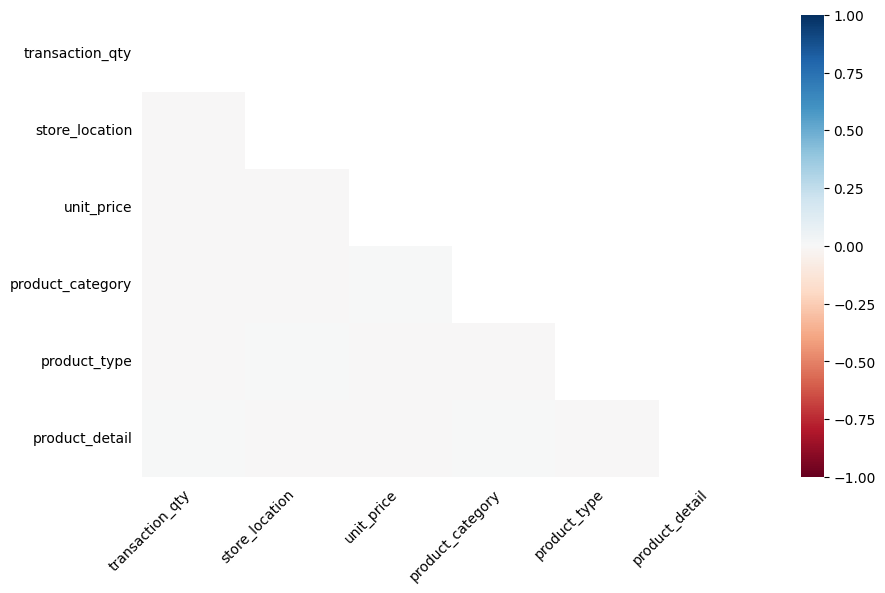

In [15]:
msno.heatmap(df = df,
            figsize = (10,6),
             fontsize = 10 );

#Özellikler arası ilişki kontolü için heatmap oluşturduk.

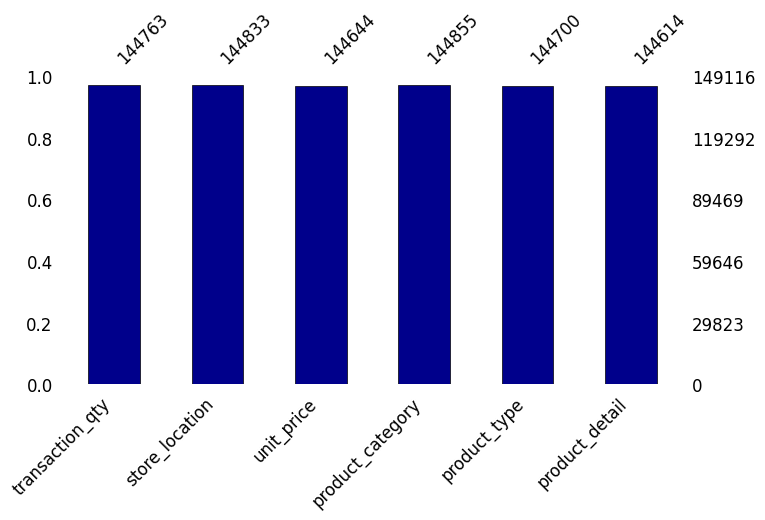

In [16]:
ax = msno.bar ( df= df,
         
        figsize =(8,4),
         fontsize= 12);

# Renklendirme 
for bar in ax.patches:
    bar.set_color('#00008B')  
    bar.set_edgecolor('black')  
    bar.set_linewidth(0.5)  

plt.show()

#Eğitimde gördüğümüz için denemek istedik :)

In [17]:
df.head(50)

,transaction_qty,store_location,unit_price,product_category,product_type,product_detail
zaman,,,,,,
2023-01-01 07:06:11,2.0,Lower Manhattan,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
2023-01-01 07:08:56,2.0,Lower Manhattan,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2023-01-01 07:14:04,2.0,Lower Manhattan,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
2023-01-01 07:20:24,1.0,Lower Manhattan,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
2023-01-01 07:22:41,2.0,Lower Manhattan,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2023-01-01 07:22:41,1.0,Lower Manhattan,3.00,Bakery,Scone,Oatmeal Scone
2023-01-01 07:25:49,1.0,Lower Manhattan,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
2023-01-01 07:33:34,2.0,Lower Manhattan,2.00,Coffee,Gourmet brewed coffee,Columbian Medium Roast Sm
2023-01-01 07:39:13,1.0,Lower Manhattan,4.25,Coffee,Barista Espresso,Latte Rg


In [18]:
df[df['product_category'].isna()&df['product_type'].isna()]
# Hem product_category hem de product_type değerleri null olan 101 tane veri satırına eriştik ve
# bunlara rastgele değerler atamak istemediğimiz için bu veri satırlarını silmeye karar verdik.

df.drop(df[df['product_category'].isna()&df['product_type'].isna()].index, inplace = True)

In [19]:
df[df['product_type'].isna()]
#product_type değerleri null olanlara rastgele değer atamak istemediğimiz için bu verileri de siliyoruz.
df.drop(df[df['product_type'].isna()].index, inplace = True)

In [20]:
df['product_category'].value_counts()

product_category
Coffee                54488
Tea                   42572
Bakery                20842
Drinking Chocolate    10717
Flavours               6123
Coffee beans           1602
Loose Tea              1098
Branded                 687
Packaged Chocolate      449
Name: count, dtype: int64